In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from collections import Counter
from optparse import OptionParser
import argparse
import matplotlib.pyplot as plt
import inspect
import seaborn as sns

## Достаём данные

In [3]:
Bacillus_altitudinis_pan_50_path = './specialists/Bacillus_altitudinis_pan_50.proteinortho'
Bifidobacterium_bifidum_pan_50_path = './specialists/Bifidobacterium_bifidum_pan_50.proteinortho'
Burkholderia_cenocepacia_pan_50_path = './specialists/Burkholderia_cenocepacia_pan_50.proteinortho'
Candidatus_Carsonella_ruddii_pan_50_path = './specialists/Candidatus_Carsonella_ruddii_pan_50.proteinortho'
Chlamydia_trachomatis_pan_50_path = './specialists/Chlamydia_trachomatis_pan_50.proteinortho'
Corynebacterium_diphtheriae_pan_50_path = './specialists/Corynebacterium_diphtheriae_pan_50.proteinortho'
Corynebacterium_pseudotuberculosis_pan_50_path = './specialists/Corynebacterium_pseudotuberculosis_pan_50.proteinortho'
Cupriavidus_taiwanensis_pan_50_path = './specialists/Cupriavidus_taiwanensis_pan_50.proteinortho'
Enterobacter_hormaechei_pan_50_path = './specialists/Enterobacter_hormaechei_pan_50.proteinortho'
Francisella_tularensis_pan_50_path = './specialists/Francisella_tularensis_pan_50.proteinortho'
Histophilus_somni_pan_50_path = './specialists/Histophilus_somni_pan_50.proteinortho'
Lactobacillus_brevis_pan_50_path = './specialists/Lactobacillus_brevis_pan_50.proteinortho'
Lactobacillus_johnsonii_pan_50_path = './specialists/Lactobacillus_johnsonii_pan_50.proteinortho'
Lactobacillus_salivarius_pan_50_path = './specialists/Lactobacillus_salivarius_pan_50.proteinortho'
Leptospira_interrogans_pan_50_path = './specialists/Leptospira_interrogans_pan_50.proteinortho'
Mesoplasma_florum_pan_50_path = './specialists/Mesoplasma_florum_pan_50.proteinortho'
Morganella_morganii_pan_50_path = './specialists/Morganella_morganii_pan_50.proteinortho'
Mycoplasma_bovis_pan_50_path = './specialists/Mycoplasma_bovis_pan_50.proteinortho'
Neisseria_gonorrhoeae_pan_50_path = './specialists/Neisseria_gonorrhoeae_pan_50.proteinortho'
Neisseria_meningitidis_pan_50_path = './specialists/Neisseria_meningitidis_pan_50.proteinortho'
Paenibacillus_larvae_pan_50_path = './specialists/Paenibacillus_larvae_pan_50.proteinortho'
Pantoea_ananatis_pan_50_path = './specialists/Pantoea_ananatis_pan_50.proteinortho'
Pediococcus_acidilactici_pan_50_path = './specialists/Pediococcus_acidilactici_pan_50.proteinortho'
Porphyromonas_gingivalis_pan_50_path = './specialists/Porphyromonas_gingivalis_pan_50.proteinortho'
Propionibacterium_freudenreichii_pan_50_path = './specialists/Propionibacterium_freudenreichii_pan_50.proteinortho'
Rhodopseudomonas_palustris_pan_50_path = './specialists/Rhodopseudomonas_palustris_pan_50.proteinortho'
Riemerella_anatipestifer_pan_50_path = './specialists/Riemerella_anatipestifer_pan_50.proteinortho'
Salinibacter_ruber_pan_50_path = './specialists/Salinibacter_ruber_pan_50.proteinortho'
Staphylococcus_haemolyticus_pan_50_path = './specialists/Staphylococcus_haemolyticus_pan_50.proteinortho'
Staphylococcus_simulans_pan_50_path = './specialists/Staphylococcus_simulans_pan_50.proteinortho'
Vibrio_anguillarum_pan_50_path = './specialists/Vibrio_anguillarum_pan_50.proteinortho'
Vibrio_campbellii_pan_50_path = './specialists/Vibrio_campbellii_pan_50.proteinortho'
Vibrio_cholerae_pan_50_path = './specialists/Vibrio_cholerae_pan_50.proteinortho'
Weissella_cibaria_pan_50_path = './specialists/Weissella_cibaria_pan_50.proteinortho'
Xanthomonas_campestris_pan_50_path = './specialists/Xanthomonas_campestris_pan_50.proteinortho'
Xylella_fastidiosa_pan_50_path = './specialists/Xylella_fastidiosa_pan_50.proteinortho'
Zymomonas_mobilis_pan_50_path = './specialists/Zymomonas_mobilis_pan_50.proteinortho'

Acinetobacter_baumannii_pan_50_path = './generalists/Acinetobacter_baumannii_pan_50.proteinortho'
Acinetobacter_indicus_pan_50 = './generalists/Acinetobacter_indicus_pan_50.proteinortho'
Agrobacterium_tumefaciens_pan_50_path = './generalists/Agrobacterium_tumefaciens_pan_50.proteinortho'
Bacillus_cereus_pan_50_path = './generalists/Bacillus_cereus_pan_50.proteinortho'
Bacillus_megaterium_pan_50_path = './generalists/Bacillus_megaterium_pan_50.proteinortho'
Bacillus_pumilus_pan_50_path = './generalists/Bacillus_pumilus_pan_50.proteinortho'
Bacillus_subtilis_pan_50_path = './generalists/Bacillus_subtilis_pan_50.proteinortho'
Bacillus_thuringiensis_pan_50_path = './generalists/Bacillus_thuringiensis_pan_50.proteinortho'
Clostridium_botulinum_pan_50_path = './generalists/Clostridium_botulinum_pan_50.proteinortho'
Enterococcus_faecalis_pan_50_path = './generalists/Enterococcus_faecalis_pan_50.proteinortho'
Escherichia_coli_pan_50_path = './generalists/Escherichia_coli_pan_50.proteinortho'
Klebsiella_pneumoniae_pan_50_path = './generalists/Klebsiella_pneumoniae_pan_50.proteinortho'
Lactococcus_lactis_pan_50_path = './generalists/Lactococcus_lactis_pan_50.proteinortho'
Mycobacterium_avium_pan_50_path = './generalists/Mycobacterium_avium_pan_50.proteinortho'
Pseudomonas_aeruginosa_pan_50_path = './generalists/Pseudomonas_aeruginosa_pan_50.proteinortho'
Pseudomonas_fluorescens_pan_50_path = './generalists/Pseudomonas_fluorescens_pan_50.proteinortho'
Pseudomonas_putida_pan_50_path = './generalists/Pseudomonas_putida_pan_50.proteinortho'
Stenotrophomonas_maltophilia_pan_50_path = './generalists/Stenotrophomonas_maltophilia_pan_50.proteinortho'


In [4]:
from collections import defaultdict

strain_counts = defaultdict(int)

with open(Acinetobacter_baumannii_pan_50_path, 'r') as file:
    
    # Skip first line 
    next(file)
    
    for line in file:
        words = line.split("\t")
        
        if len(words) > 3:
            # Extract strain count 
            strain = int(words[0])
            
            # Increment count for this strain
            strain_counts[strain] += 1
            
print(strain_counts)

defaultdict(<class 'int'>, {175: 43, 183: 1161, 36: 16, 181: 307, 180: 200, 169: 12, 122: 2, 8: 183, 120: 12, 182: 601, 179: 133, 178: 84, 177: 75, 154: 8, 105: 29, 141: 5, 171: 36, 55: 13, 34: 34, 174: 36, 162: 13, 173: 37, 170: 20, 166: 25, 145: 7, 147: 7, 155: 9, 172: 24, 176: 40, 163: 11, 56: 9, 104: 20, 143: 3, 144: 4, 159: 7, 103: 20, 165: 21, 160: 16, 168: 16, 87: 3, 167: 17, 129: 8, 152: 8, 158: 8, 156: 7, 6: 211, 121: 5, 107: 9, 28: 28, 67: 3, 133: 1, 100: 16, 52: 11, 150: 8, 119: 9, 151: 3, 137: 3, 94: 11, 106: 16, 35: 18, 39: 22, 148: 10, 127: 7, 161: 8, 164: 14, 140: 7, 102: 8, 125: 4, 124: 5, 48: 19, 31: 21, 2: 1077, 138: 7, 97: 12, 38: 14, 53: 14, 117: 6, 139: 6, 136: 7, 99: 9, 123: 3, 153: 7, 149: 5, 14: 94, 115: 10, 118: 11, 69: 6, 157: 2, 91: 13, 54: 23, 109: 4, 30: 25, 128: 3, 131: 2, 132: 3, 108: 2, 40: 14, 134: 4, 98: 11, 45: 11, 33: 26, 142: 3, 71: 6, 47: 12, 96: 4, 43: 24, 116: 10, 78: 8, 146: 2, 75: 3, 66: 3, 49: 27, 5: 305, 13: 83, 95: 5, 51: 8, 65: 3, 101: 8, 2

## По координатам стоим кривую

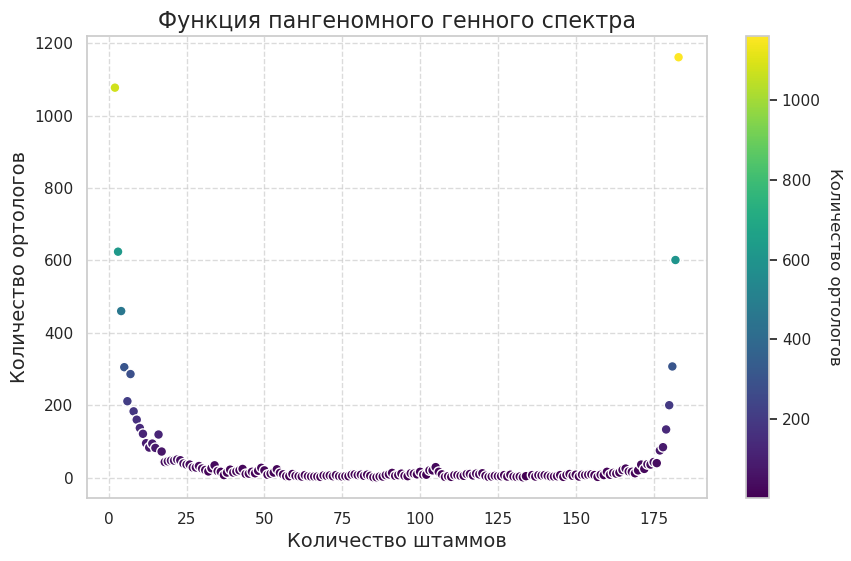

In [6]:
import seaborn as sns

# Use Seaborn style
sns.set(style="whitegrid")

# Sort dictionary items by key to get coordinates 
coords = sorted(strain_counts.items())  

# Unpack coordinates into separate lists
x_coords, y_coords = zip(*coords)

# Plot scatter plot  
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_coords, y_coords, c=y_coords, cmap='viridis', edgecolors='w', s=50)

# Add colorbar for better interpretation
cbar = plt.colorbar(scatter)
cbar.set_label('Количество ортологов', rotation=270, labelpad=15)

# Add plot labels and title
plt.title("Функция пангеномного генного спектра", fontsize=16) 
plt.xlabel("Количество штаммов", fontsize=14)
plt.ylabel("Количество ортологов", fontsize=14)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


## Аппроксимируем

In [21]:
x_data = np.array(x_coords)  # переводим в массивы так как дальше работаем с нампаем
y_data = np.array(y_coords)

# формула суммы трёх экспонент
def func_exp(x, a1, b1, a2, b2, a3, b3):
    return np.exp(x * a1 + b1) + \
           np.exp(x * a2 + b2) +  \
           np.exp(x * a3 + b3)


# фомула суммы двух степенных функций
def func_pwr(x, a1, b1, a2, b2):
    return a1 * np.power(x + 1, b1) + \
           a2 * np.power(201 - x, b2)

def quality_metrics(array_observed,
                    array_predicted,
                    N_params):

    N_points = len(array_observed)
    if len(array_observed) != len(array_predicted):
        raise ValueError

    sse = sum((array_observed - array_predicted)**2)
    AIC = 2*N_params + N_points*np.log(sse)
    BIC = N_params*np.log(N_points) + N_points*np.log(sse)
    return {"AIC": AIC,
            "BIC": BIC,
            "SSE": sse,
            "RMSD": sse/N_points}


/tmp/ipykernel_2916688/3010311544.py:6: RuntimeWarning: overflow encountered in exp
  return np.exp(x * a1 + b1) + \
/tmp/ipykernel_2916688/3010311544.py:14: RuntimeWarning: divide by zero encountered in power
  a2 * np.power(201 - x, b2)


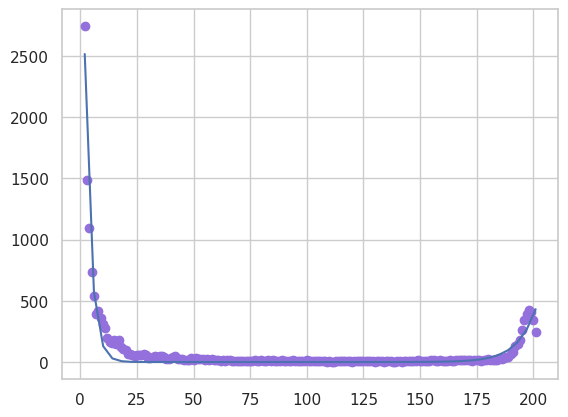

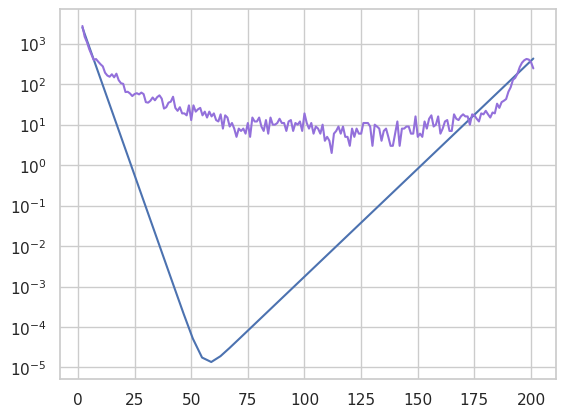

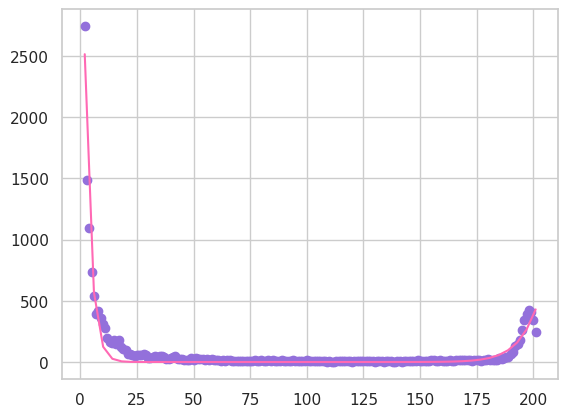

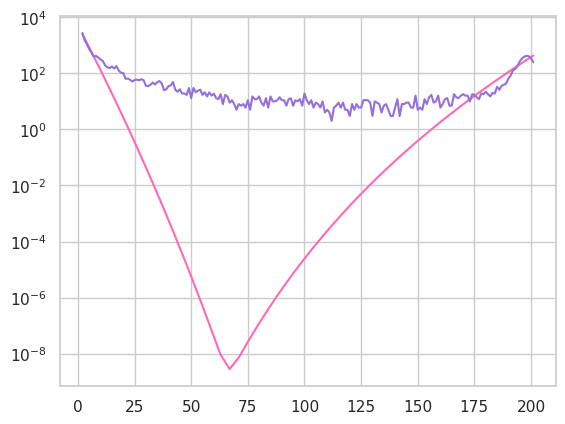

Quality Metrics for Exponential Fit:  {'AIC': 2665.8923830543367, 'BIC': 2685.682287253625, 'SSE': 579234.0551914205, 'RMSD': 2896.1702759571026}

Quality Metrics for Power Fit:  {'AIC': 2665.9142900968113, 'BIC': 2679.1075595630036, 'SSE': 591000.0910706382, 'RMSD': 2955.000455353191}


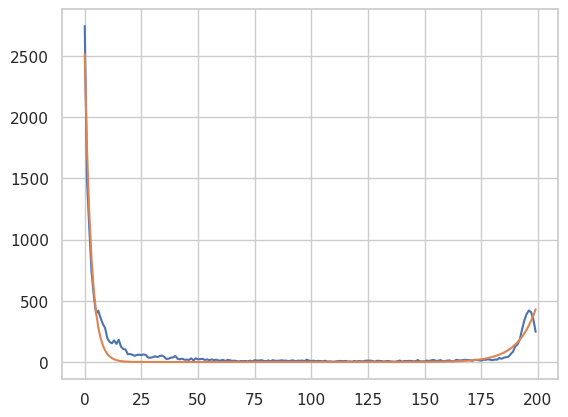

[2743 1486 1094  737  540  395  419  359  311  276  192  164  153  176
  148  182  126  106  102   64   65   59   51   57   60   56   62   57
   36   35   39   47   40   48   53   44   25   27   35   37   49   26
   22   27   19   19   17   30   13   30   21   24   26   17   21   15
   21   16   19   13   12   18    8   17   15    9   11    8    5    8
    7    8    6   11    5   15   12   12   15    9    7   13    6   15
   10   10   11   14   11   11    7   12   13    7   11   10   12    7
   19   11    8   11    6    9    8    6   10    4    5    4    2    6
    7    9    6    9    5    5    3    8    5    8    6    6   11   11
   11    9    3   10    9    8    4    7    8    5    3    3    6   12
    3    8    8    9    9    6    6   16    5    6    5   12    8   14
   17    9   10   16    6    8   12   13    7    7   18   14   13   16
   18   16   16   10   18   17   14   12   19   18   22   18   15   20
   19   33   26   36   39   43   65   84  128  143  183  265  340  391
  421 

In [22]:
# аппроксимируем для экспоненты
x = x_data
y = y_data
p0 = [-1, 1000, -1, 1, 10, 1]
popt_exp, pcov = curve_fit(func_exp, x, y, None, maxfev=10000000)
# аппрокимируем для степенной функции
# подбираем параметры, чтобы органичить множество возможных подстановок
p0 = [-10, 1, 10, 10]
popt_pwr, pcov = curve_fit(func_pwr, x, y, None, maxfev=10000000)
# находим координаты для аппроксимаций
x_app = np.linspace(min(x), max(x))
y_app_exp = func_exp(x_app, *popt_exp)
# рисуем
plt.plot(x_app, y_app_exp)
plt.scatter(x, y, color='mediumpurple')
plt.show()
plt.semilogy(x_app, y_app_exp)
plt.semilogy(x, y, color='mediumpurple')
plt.show()
# повторяем всё для степенной
x_app = np.linspace(min(x), max(x))
y_app_pwr = func_pwr(x_app, *popt_pwr)
# рисуем
plt.plot(x_app, y_app_pwr, color='hotpink')
plt.scatter(x, y, color='mediumpurple')
plt.show()
plt.semilogy(x_app, y_app_pwr, color='hotpink')
plt.semilogy(x, y, color='mediumpurple')
plt.show()
# смотрим, насколько наши аппроксимации отличаются от кривой
y_observed = y_data
y_predicted_exp = func_exp(x, *popt_exp)
y_predicted_pwr = func_pwr(x, *popt_pwr)
N_params_exp = len(popt_exp)
N_params_pwr = len(popt_pwr)

exp_metrics = quality_metrics(y_observed, y_predicted_exp, N_params_exp)
print("Quality Metrics for Exponential Fit: ", exp_metrics)

pwr_metrics = quality_metrics(y_observed, y_predicted_pwr, N_params_pwr)
print("\nQuality Metrics for Power Fit: ", pwr_metrics)

# смотрим на графике на разницу
plt.plot(y_observed)
plt.plot(y_predicted_exp)
plt.show()
print(y)
print(y_app_exp)
for k in sorted(strain_counts.keys()):
    print(k, strain_counts[k])

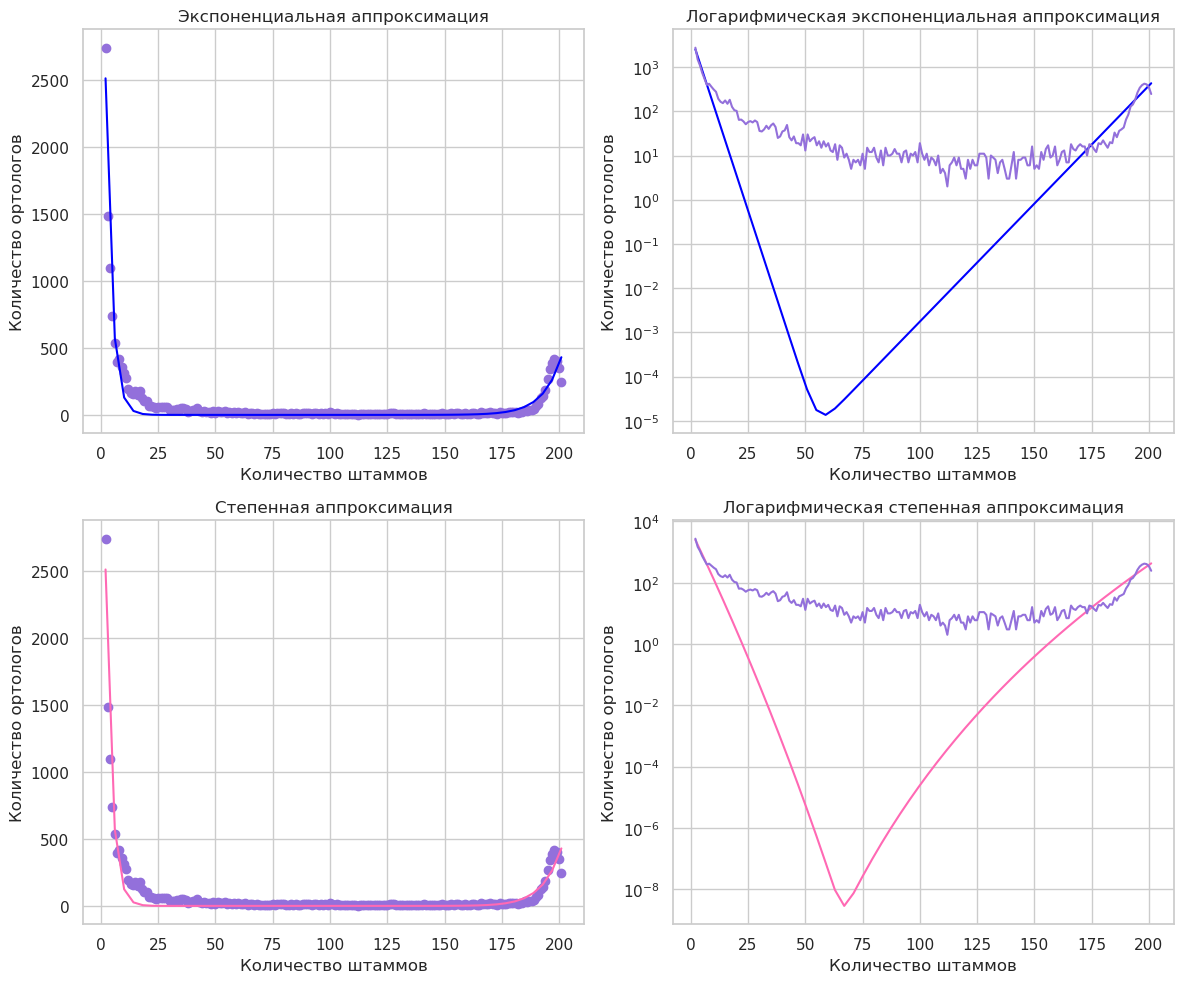

In [23]:
# Графики
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Экспонента
axs[0, 0].plot(x_app, y_app_exp, label='Экспонента', color='blue')
axs[0, 0].scatter(x_data, y_data, color='mediumpurple')
axs[0, 0].set_title('Экспоненциальная аппроксимация')
axs[0, 0].set_xlabel('Количество штаммов')
axs[0, 0].set_ylabel('Количество ортологов')

# Логарифмическая экспонента
axs[0, 1].semilogy(x_app, y_app_exp, label='Экспонента', color='blue')
axs[0, 1].semilogy(x_data, y_data, color='mediumpurple')
axs[0, 1].set_title('Логарифмическая экспоненциальная аппроксимация')
axs[0, 1].set_xlabel('Количество штаммов')
axs[0, 1].set_ylabel('Количество ортологов')

# Степенная функция
axs[1, 0].plot(x_app, y_app_pwr, label='Степенная функция', color='hotpink')
axs[1, 0].scatter(x_data, y_data, color='mediumpurple')
axs[1, 0].set_title('Степенная аппроксимация')
axs[1, 0].set_xlabel('Количество штаммов')
axs[1, 0].set_ylabel('Количество ортологов')

# Логарифмическая степенная функция
axs[1, 1].semilogy(x_app, y_app_pwr, label='Степенная функция', color='hotpink')
axs[1, 1].semilogy(x_data, y_data, color='mediumpurple')
axs[1, 1].set_title('Логарифмическая степенная аппроксимация')
axs[1, 1].set_xlabel('Количество штаммов')
axs[1, 1].set_ylabel('Количество ортологов')

plt.tight_layout()

# Сохраняем график как картинку
plt.savefig('my_plot.png')

plt.show()


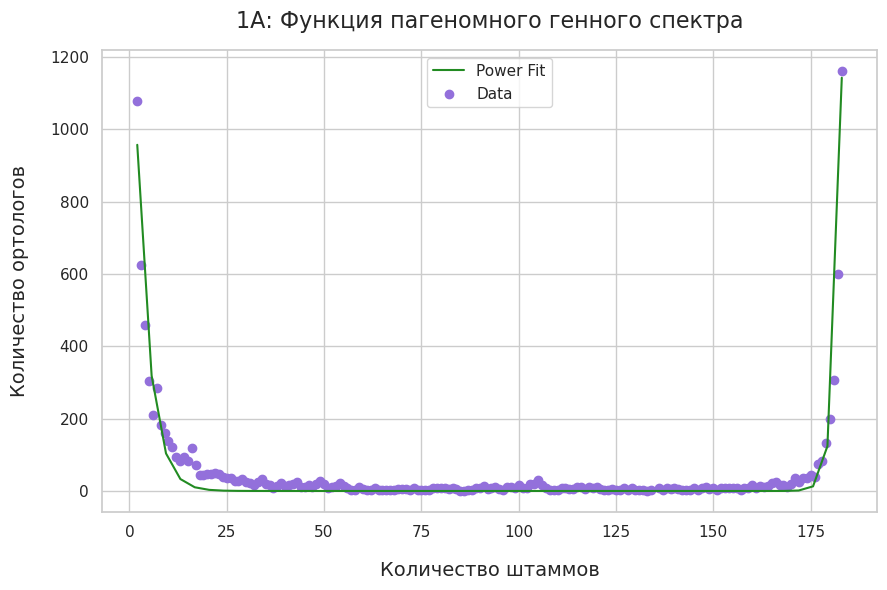

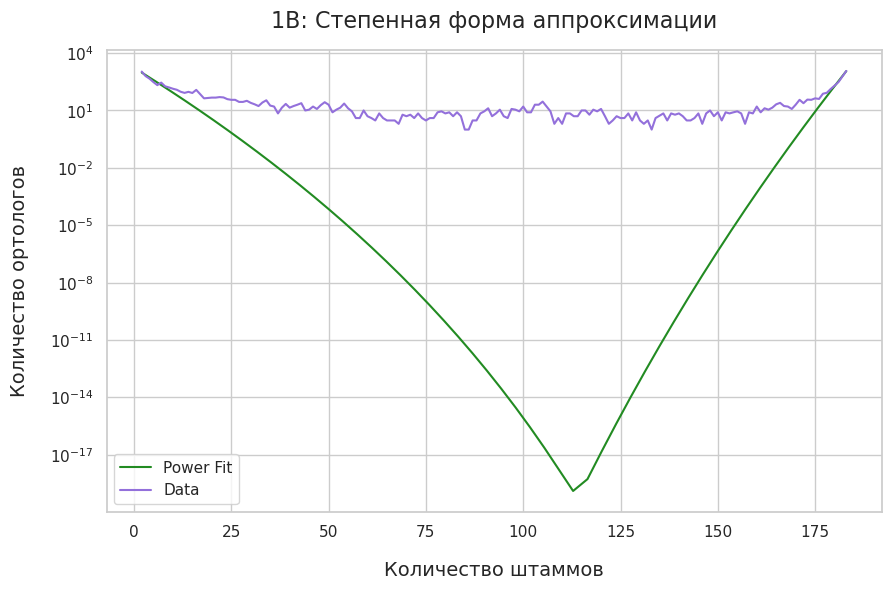

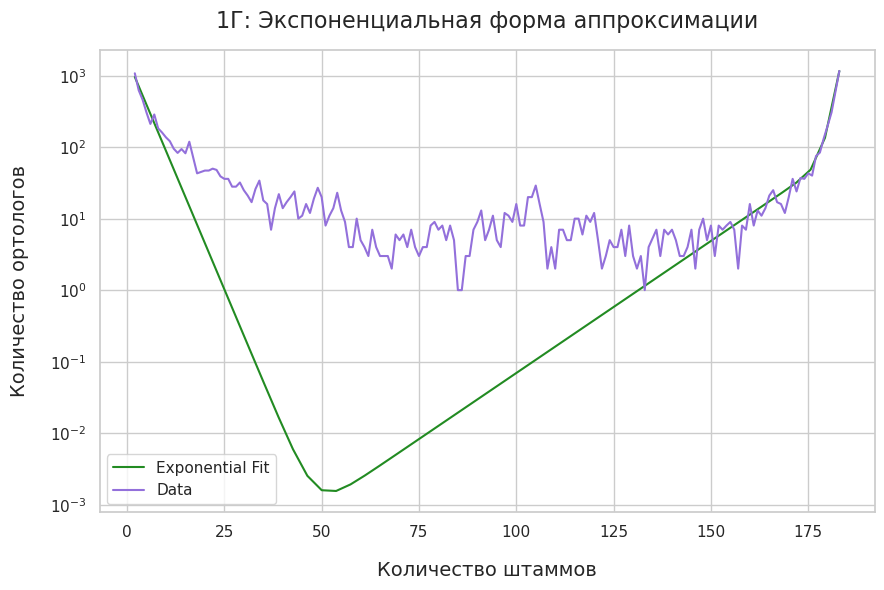

In [14]:
# Set Seaborn style
sns.set(style="whitegrid")

# Define color palette
colors = ['forestgreen', 'mediumpurple']

# Define figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Power Fit
plt.plot(x_app, y_app_pwr, color=colors[0], label='Power Fit')
plt.scatter(x, y, color=colors[1], label='Data')
plt.title("1А: Функция пагеномного генного спектра", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.legend()
#plt.savefig('ris1a.pdf', bbox_inches='tight')
plt.show()

# Power Fit (Log Scale)
fig, ax = plt.subplots(figsize=(10, 6))
plt.semilogy(x_app, y_app_pwr, color=colors[0], label='Power Fit')
plt.semilogy(x, y, color=colors[1], label='Data')
plt.title("1В: Степенная форма аппроксимации", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.legend()
#plt.savefig('ris1b.pdf', bbox_inches='tight')
plt.show()

# Exponential Fit (Log Scale)
fig, ax = plt.subplots(figsize=(10, 6))
plt.semilogy(x_app, y_app_exp, color=colors[0], label='Exponential Fit')
plt.semilogy(x, y, color=colors[1], label='Data')
plt.title("1Г: Экспоненциальная форма аппроксимации", fontsize=16, y=1.03)
plt.xlabel("Количество штаммов", fontsize=14, labelpad=15)
plt.ylabel("Количество ортологов", fontsize=14, labelpad=15)
plt.legend()
#plt.savefig('ris1c.pdf', bbox_inches='tight')
plt.show()


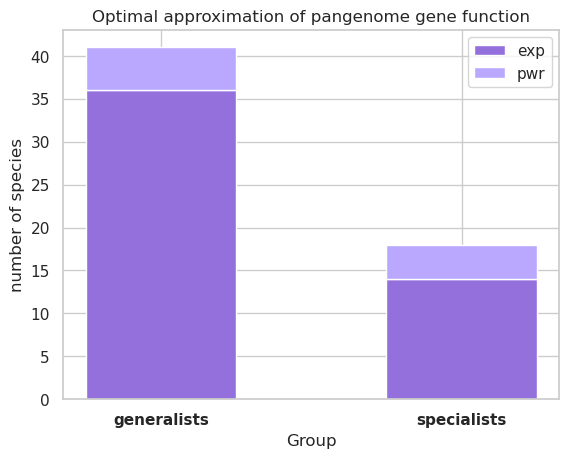

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Values of each group
bars2 = [5, 4]
bars1 = [36, 14]

# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()

# The position of the bars on the x-axis
r = [0, 1]

# Names of group and bar width
names = ['generalists', 'specialists']
barWidth = 0.5  # Reduced the width for aesthetic purposes

# Create purple bars
plt.bar(r, bars1, color='#9370db', edgecolor='white', width=barWidth, label='exp')
# Create lighter purple bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#baa8ff', edgecolor='white', width=barWidth, label='pwr')

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Group")

# Custom Y axis label
plt.ylabel("number of species")

# Set a title
plt.title("Optimal approximation of pangenome gene function")

# Add legend
plt.legend()

# Show graphic
plt.show()


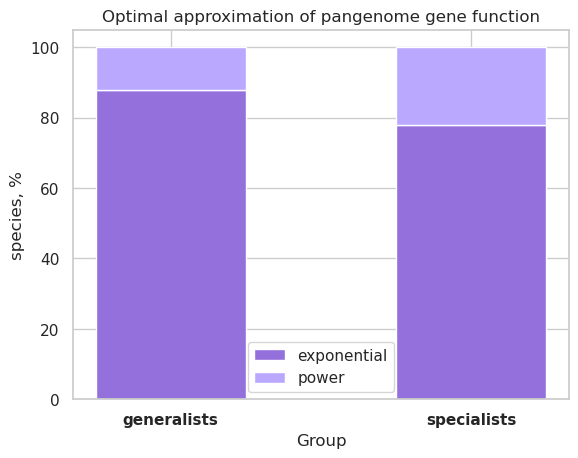

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Values of each group
bars2 = [12.2, 22.22]
bars1 = [87.8, 77.78]

# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()

# The position of the bars on the x-axis
r = [0, 1]

# Names of group and bar width
names = ['generalists', 'specialists']
barWidth = 0.5  # Reduced the width for aesthetic purposes

# Create purple bars
plt.bar(r, bars1, color='#9370db', edgecolor='white', width=barWidth, label='exponential')
# Create lighter purple bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#baa8ff', edgecolor='white', width=barWidth, label='power')

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Group")

# Custom Y axis label
plt.ylabel("species, %")

# Set a title
plt.title("Optimal approximation of pangenome gene function")

# Add legend
plt.legend()

# Show graphic
plt.show()

In [12]:
data_species_aics = pd.read_csv('species_aics.csv')
data_species_aics

,species,ecosites_empo3_old,genomes_obtained,status,genomes,approximation for all,AIC exp,AIC power,AIC exp random10,AIC pwr random10,approximation random
0,Salinibacter ruber,"['Animal surface', 'Surface (non-saline)']",9,specialist,9,exp,75.4110,76.690,NaN,NaN,NaN
1,Candidatus Carsonella ruddii,"['Water (non-saline)', 'Animal surface']",9,specialist,9,exp,53.2970,63.073,NaN,NaN,NaN
2,Paenibacillus larvae,"['Animal corpus', 'Water (non-saline)', 'Anima...",9,specialist,9,pwr,100.2060,97.489,NaN,NaN,NaN
3,Bifidobacterium bifidum,['Plant rhizosphere'],10,specialist,10,exp,87.4200,87.900,NaN,NaN,NaN
4,Rhodopseudomonas palustris,['Water (non-saline)'],9,specialist,9,exp,90.5660,105.939,NaN,NaN,NaN
5,Staphylococcus simulans,"['Surface (non-saline)', 'Animal surface', 'An...",9,specialist,9,pwr,91.2710,86.797,NaN,NaN,NaN
6,Weissella cibaria,['Animal surface'],9,specialist,9,pwr,75.9000,72.280,NaN,NaN,NaN
7,Pantoea ananatis,['Animal secretion'],9,specialist,9,exp,68.1190,83.301,NaN,NaN,NaN
8,Lactobacillus salivarius,"['Animal proximal gut', 'Aerosol (non-saline)']",10,specialist,10,exp,67.5510,85.020,NaN,NaN,NaN
9,Lactobacillus johnsonii,['Animal secretion'],12,specialist,12,exp,88.8200,111.396,133.512,129.168,pwr


Text(0, 0.5, 'Average Difference in AIC')

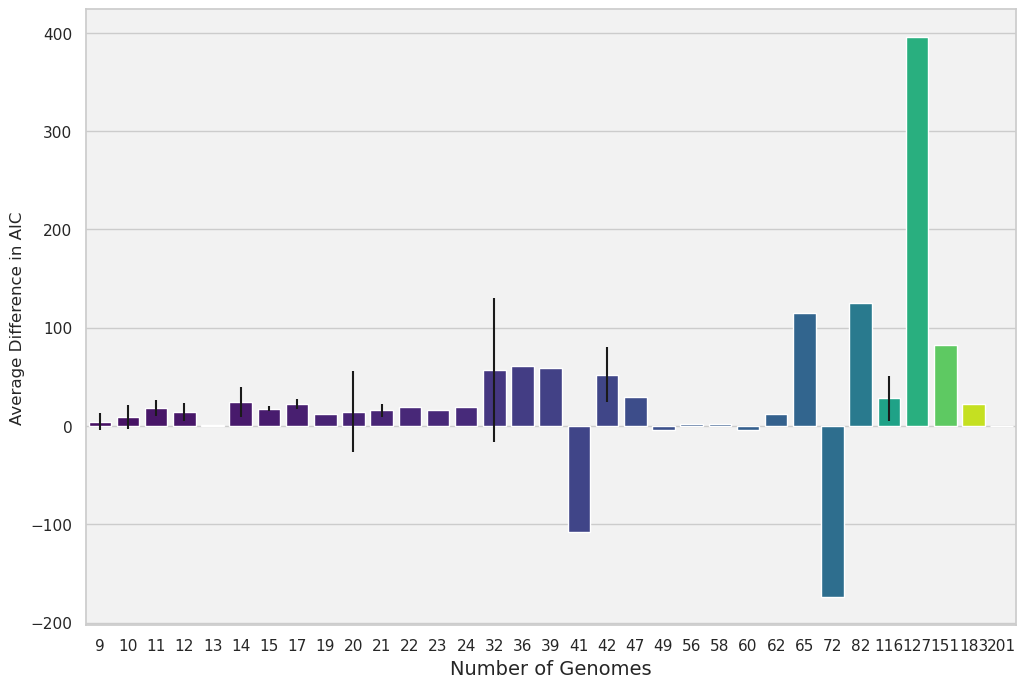

In [46]:
# Filter out rows with NaN values in the "AIC exp" and "AIC power" columns
data_filtered = data_species_aics.dropna(subset=['AIC exp', 'AIC power'])

# Calculate the difference between "AIC exp" and "AIC power"
data_filtered['AIC_diff'] = data_filtered['AIC power'] - data_filtered['AIC exp']

# Group by the number of genomes and calculate the average difference in AICs and standard deviation
average_diff_per_genome = data_filtered.groupby('genomes')['AIC_diff'].agg(['mean', 'std']).reset_index()

# Create the bar plot with error bars
plt.figure(figsize=(12, 8))
sns.barplot(x='genomes', y='mean', data=average_diff_per_genome, color='purple', yerr=average_diff_per_genome['std'])

# Add a gradient color based on the number of genomes
ax = plt.gca()
ax.set_facecolor('#f2f2f2')
for bar, genome_count in zip(ax.patches, average_diff_per_genome['genomes']):
    bar.set_facecolor(plt.cm.viridis(genome_count / max(average_diff_per_genome['genomes'])))

# Set labels and title
plt.xlabel('Number of Genomes', fontsize=14)
plt.ylabel('Average Difference in AIC')


In [42]:
data_species_genomesize = pd.read_csv('species_genomesize.csv')
data_species_genomesize

,species,ecosites_empo3_old,genomes_obtained,status,genomes,approximation for all,AIC exp,AIC power,AIC exp random10,AIC pwr random10,approximation random,"genome length, Mb"
0,Salinibacter ruber,"['Animal surface', 'Surface (non-saline)']",9,specialist,9,exp,75.4110,76.690,NaN,NaN,NaN,3.9020
1,Candidatus Carsonella ruddii,"['Water (non-saline)', 'Animal surface']",9,specialist,9,exp,53.2970,63.073,NaN,NaN,NaN,0.1662
2,Paenibacillus larvae,"['Animal corpus', 'Water (non-saline)', 'Anima...",9,specialist,9,pwr,100.2060,97.489,NaN,NaN,NaN,4.3780
3,Bifidobacterium bifidum,['Plant rhizosphere'],10,specialist,10,exp,87.4200,87.900,NaN,NaN,NaN,2.2160
4,Rhodopseudomonas palustris,['Water (non-saline)'],9,specialist,9,exp,90.5660,105.939,NaN,NaN,NaN,5.4570
5,Staphylococcus simulans,"['Surface (non-saline)', 'Animal surface', 'An...",9,specialist,9,pwr,91.2710,86.797,NaN,NaN,NaN,2.6820
6,Weissella cibaria,['Animal surface'],9,specialist,9,pwr,75.9000,72.280,NaN,NaN,NaN,2.3630
7,Pantoea ananatis,['Animal secretion'],9,specialist,9,exp,68.1190,83.301,NaN,NaN,NaN,4.8670
8,Lactobacillus salivarius,"['Animal proximal gut', 'Aerosol (non-saline)']",10,specialist,10,exp,67.5510,85.020,NaN,NaN,NaN,2.2560
9,Lactobacillus johnsonii,['Animal secretion'],12,specialist,12,exp,88.8200,111.396,133.512,129.168,pwr,1.9510


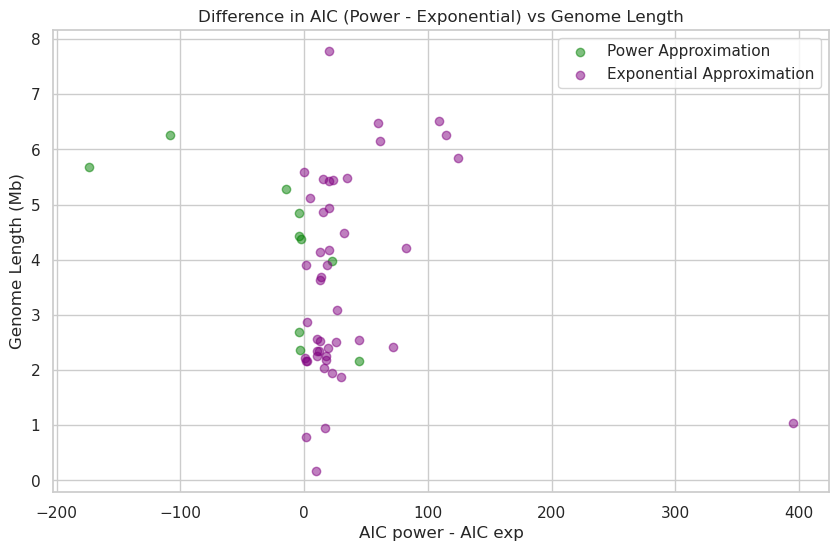

In [48]:
# Select relevant columns for visualization
selected_columns = ['AIC power', 'AIC exp', 'approximation for all', 'genome length, Mb']

# Drop rows with NaN values in selected columns
df_selected = data_species_genomesize[selected_columns].dropna()

# Convert 'genome length, Mb' column to numeric
df_selected['genome length, Mb'] = pd.to_numeric(df_selected['genome length, Mb'], errors='coerce')

# Calculate the difference in AIC between power and exponential functions
df_selected['AIC_difference'] = df_selected['AIC power'] - df_selected['AIC exp']

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot with 'AIC_difference' on x-axis and 'genome length, Mb' on y-axis
power_df = df_selected[df_selected['approximation for all'] == 'pwr']
exp_df = df_selected[df_selected['approximation for all'] == 'exp']

plt.scatter(power_df['AIC_difference'], power_df['genome length, Mb'], c='green', alpha=0.5, label='Power Approximation')
plt.scatter(exp_df['AIC_difference'], exp_df['genome length, Mb'], c='purple', alpha=0.5, label='Exponential Approximation')

plt.xlabel('AIC power - AIC exp')
plt.ylabel('Genome Length (Mb)')
plt.title('Difference in AIC (Power - Exponential) vs Genome Length')
plt.grid(True)
plt.legend()
plt.show()

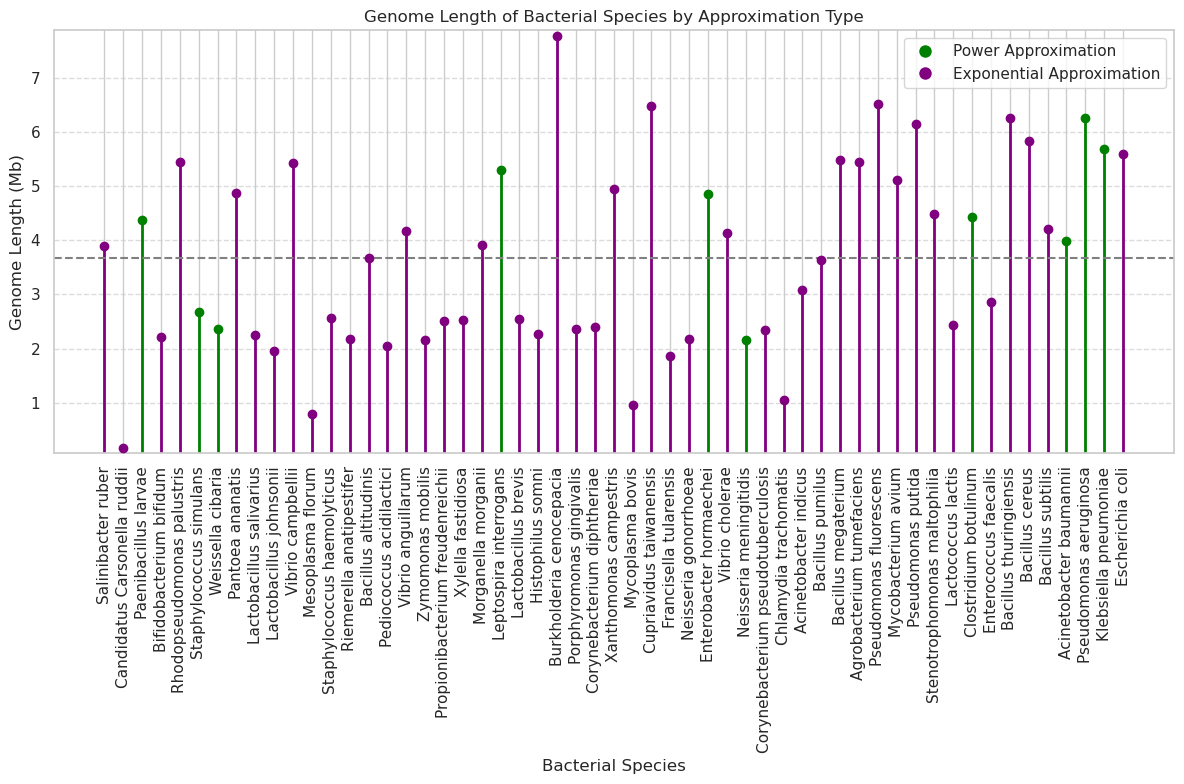

In [58]:

# Select relevant columns for visualization
selected_columns_lp = ['species', 'approximation for all', 'genome length, Mb']

# Drop rows with NaN values in selected columns
df_selected_lp = data_species_genomesize[selected_columns_lp].dropna()

# Set colors for different approximations
colors = {'pwr': 'green', 'exp': 'purple'}

# Calculate the median genome length
median_genome_length = df_selected_lp['genome length, Mb'].median()

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each row and plot lollipops
for index, row in df_selected_lp.iterrows():
    plt.plot([index, index], [0, row['genome length, Mb']], color=colors[row['approximation for all']], linewidth=2)
    plt.scatter(index, row['genome length, Mb'], color=colors[row['approximation for all']], zorder=5)

plt.xticks(range(len(df_selected_lp)), df_selected_lp['species'], rotation=90)
plt.xlabel('Bacterial Species')
plt.ylabel('Genome Length (Mb)')
plt.title('Genome Length of Bacterial Species by Approximation Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create legend with custom labels
legend_labels = ['Power Approximation', 'Exponential Approximation']
legend_colors = ['green', 'purple']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors],
           labels=legend_labels)

# Add a dotted line for the median genome length
plt.axhline(y=median_genome_length, color='grey', linestyle='--', label=f'Median: {median_genome_length:.2f} Mb')

plt.ylim(df_selected_lp['genome length, Mb'].min() - 0.1, df_selected_lp['genome length, Mb'].max() + 0.1)
plt.tight_layout()
plt.show()

In [59]:
median_genome_length

3.682

In [60]:
# Filter rows for power approximation
power_df = data_species_genomesize[data_species_genomesize['approximation for all'] == 'pwr']

# Calculate the average genome length for power approximation
average_genome_length_power = power_df['genome length, Mb'].mean()

print("Average genome length for power approximation:", average_genome_length_power)

Average genome length for power approximation: 4.208600000000001


In [61]:
# Filter rows for exp approximation
exp_df = data_species_genomesize[data_species_genomesize['approximation for all'] == 'exp']

# Calculate the average genome length for power approximation
average_genome_length_power = exp_df['genome length, Mb'].mean()

print("Average genome length for exponential approximation:", average_genome_length_power)

Average genome length for exponential approximation: 3.5816533333333336


In [109]:
# функция, которая выбирает случайные штаммы из выдачи протеинорто
def func_pwr_r(x, a1, b1, a2, b2):
    return a1 * np.power(x + 1, b1) + \
           a2 * np.power(11 - x, b2)

def rand_strains(filename, numb_str):
    # читаем файл и строим таблицу, из которой будем вытаскивать
    df = pd.read_csv(filename, sep="\t", engine='python')
    df = df.drop(['# Species', 'Genes', 'Alg.-Conn.'], axis=1)
    df = df.T
    df = df.sample(n=numb_str)
    # вытаскиваем рандомные штаммы и считаем ортологи
    lst_r = []
    df = df.replace('*', np.nan)
    for column in df:
        count_nan = df[column].isnull().sum().sum()
        lst_r.append(count_nan)
    dic_r = Counter(lst_r)
    lists_r = sorted(dic_r.items())
    # создаём массивы-координаты У-кривой
    x_r, y_r = zip(*lists_r)
    x_data_r = np.array(x_r)
    y_data_r = np.array(y_r)
    popt_exp_r, pcov_r = curve_fit(func_exp, x_data_r, y_data_r, None, maxfev=100000)
    # аппроксимируем
    p0 = [-1, 1, -1, 1]
    popt_pwr_r, pcov_r = curve_fit(func_pwr_r, x_data_r, y_data_r, None, maxfev=100000)
    # формируем массивы с координатами для аппроксимаций
    x_app_r = np.linspace(min(x_data_r), max(x_data_r))
    y_app_exp_r = func_exp(x_app_r, *popt_exp_r)

    x_app_r = np.linspace(min(x_data_r), max(x_data_r))
    y_app_pwr_r = func_pwr_r(x_app_r, *popt_pwr_r)
    # считаем статистические характеристики
    y_observed_r = y_data_r
    y_predicted_exp_r = func_exp(x_data_r, *popt_exp_r)
    y_predicted_pwr_r = func_pwr_r(x_data_r, *popt_pwr_r)
    N_params_exp_r = len(popt_exp_r)
    N_params_pwr_r = len(popt_pwr_r)
    # смотрим, что получилось
    print('For power function: ',
          quality_metrics(y_data_r,
                          y_predicted_pwr_r,
                          N_params_pwr_r))
    print('For exp function: ',
          quality_metrics(y_data_r,
                          y_predicted_exp_r,
                          N_params_exp_r))

In [110]:
rand_strains(Burkholderia_cenocepacia_pan_50_path, numb_str=10)

For power function:  {'AIC': 139.08004966336392, 'BIC': 140.6716307545574, 'SSE': 149696.94327804312, 'RMSD': 13608.813025276648}
For exp function:  {'AIC': 144.03595292993876, 'BIC': 146.42332456672898, 'SSE': 163287.6173027501, 'RMSD': 14844.328845704555}


/tmp/ipykernel_3381572/1599579271.py:7: RuntimeWarning: overflow encountered in exp
  np.exp(x * a2 + b2) +  \
/tmp/ipykernel_3381572/1599579271.py:8: RuntimeWarning: overflow encountered in exp
  np.exp(x * a3 + b3)


In [114]:
columns = ['Species', 'AIC', 'BIC', 'SSE', 'RMSD']
data = []

bacteria_name = 'Burkholderia_cenocepacia'
results = rand_strains(Burkholderia_cenocepacia_pan_50_path, numb_str=10)

data.append([bacteria_name, 'Power', results['power_function']['AIC'], results['power_function']['BIC'],
             results['power_function']['SSE'], results['power_function']['RMSD']])
data.append([bacteria_name, 'Exp', results['exp_function']['AIC'], results['exp_function']['BIC'],
             results['exp_function']['SSE'], results['exp_function']['RMSD']])

# Создаем DataFrame
df_result = pd.DataFrame(data, columns=columns)

# Выводим результат
print(df_result)

For power function:  {'AIC': 158.24257716693148, 'BIC': 159.83415825812497, 'SSE': 854623.3342251889, 'RMSD': 77693.03038410809}
For exp function:  {'AIC': 162.50240817882676, 'BIC': 164.88977981561698, 'SSE': 875050.7005668548, 'RMSD': 79550.06368789589}


TypeError: 'NoneType' object is not subscriptable

In [59]:
def main(nw_file_name, proteinotho, 
         config, nmb_of_stains, iterat, up_bound, low_band):
  
    MyFile=open(str(nw_file), 'a+')
    headings = ['Number of random stains', 'Iteration number',
                'X coord', 'Y coord',
                'Exp params', 'Power params',
                'AIC, BIC, sse for power func',
                'AIC, BIC, sse for exp func', '/n']
    print(headings)
        
    for i in range(low_band, up_band):
        for k in range (iterations):
            some_list = []
            some_list.append(i)
            random_params = rand_strains(proteinortho, nmb_of_stains)
            some_list.append(k)
            some_list.append(random_params)
            some-list.append('/n')
            print(some_list)
    MyFile.close()


parser = OptionParser()
parser.add_option("-n", "--nw_file_name", help="New output file name")
parser.add_option("-p", "--proteinortho_file_name", help="Name of proteinorto")
parser.add_option("-c", "--config", help="Config file (FULL PATH: python)")
parser.add_option("-i", "--iterations", help="Number of iterations")
parser.add_option("-s", "--strains_numb", help="Needed strains number")
parser.add_option("-M", "--max_numb", help="Max strains number")
parser.add_option("-m", "--min_numb", help="Min stains number has to be >= 9")
parser.add_option("-d", "--out dir", help="Output directory")
opt, args = parser.parse_args()


Usage: ipykernel_launcher.py [options]

ipykernel_launcher.py: error: no such option: -f


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [ ]:
main(opt.nw_file_name, opt.proteinortho,
     opt.config, opt.iterat, opt.up_bound, opt.low_band)